In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tsfresh import extract_features, select_features

from tsfuse.data import Collection
from tsfuse.construction import construct

from xgboost import XGBClassifier, plot_importance

from dataset import load

# Dataset

In [2]:
# Time series data
X_train = pd.read_csv('dataset/X_train.csv', index_col=0)
X_test = pd.read_csv('dataset/X_test.csv', index_col=0)

# Labels
y_train = pd.read_csv('dataset/y_train.csv', index_col=0).iloc[:, 0]
y_test = pd.read_csv('dataset/y_test.csv', index_col=0).iloc[:, 0]

In [3]:
X_train.head()

,id,time,u,v,w
0,0,0,6.607910,6.845581,7.120483
1,0,1,6.723755,6.845581,7.120483
2,0,2,6.723755,6.847290,7.089600
3,0,3,6.723755,6.906616,7.142212
4,0,4,6.768066,6.930908,7.155518


In [4]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: 0, dtype: int64

# tsfresh

Step 1: Compute all features

In [5]:
features_train_tsfresh = extract_features(X_train, column_id='id', column_sort='time')
features_test_tsfresh = extract_features(X_test, column_id='id', column_sort='time')
features_train_tsfresh.head()

Feature Extraction: 100%|██████████| 20/20 [00:02<00:00,  7.52it/s]


,u__variance_larger_than_standard_deviation,u__has_duplicate_max,u__has_duplicate_min,u__has_duplicate,u__sum_values,u__abs_energy,u__mean_abs_change,u__mean_change,u__mean_second_derivative_central,u__median,...,w__fourier_entropy__bins_5,w__fourier_entropy__bins_10,w__fourier_entropy__bins_100,w__permutation_entropy__dimension_3__tau_1,w__permutation_entropy__dimension_4__tau_1,w__permutation_entropy__dimension_5__tau_1,w__permutation_entropy__dimension_6__tau_1,w__permutation_entropy__dimension_7__tau_1,w__query_similarity_count__query_None__threshold_0.0,w__mean_n_absolute_max__number_of_maxima_7
0,0.0,1.0,0.0,1.0,54.002441,364.571448,0.032593,0.032593,-0.009654,6.745911,...,0.950271,0.950271,1.332179,0.867563,0.950271,1.039721,1.098612,0.693147,NaN,7.176339
1,0.0,1.0,0.0,1.0,55.338013,382.876959,0.038208,0.038208,-0.004415,6.865601,...,0.500402,0.500402,1.609438,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,NaN,7.391392
2,0.0,1.0,0.0,1.0,56.521973,399.372148,0.032645,0.012312,0.000000,7.050537,...,1.054920,1.609438,1.609438,0.867563,1.332179,1.386294,1.098612,0.693147,NaN,7.547695
3,0.0,1.0,1.0,1.0,57.895630,419.065609,0.036325,0.036325,0.000000,7.234497,...,0.950271,1.332179,1.609438,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,NaN,7.703945
4,0.0,1.0,0.0,1.0,58.885376,433.455174,0.029977,0.019932,-0.013041,7.374023,...,0.950271,0.950271,1.609438,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,NaN,7.861503


Step 2: Select relevant features

In [6]:
features_train_tsfresh = features_train_tsfresh.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
features_train_tsfresh = select_features(features_train_tsfresh, y_train)
features_train_tsfresh.head()

,v__last_location_of_maximum,v__first_location_of_maximum,"v__agg_linear_trend__attr_""rvalue""__chunk_len_5__f_agg_""max""","v__linear_trend__attr_""rvalue""","v__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""max""",v__first_location_of_minimum,v__last_location_of_minimum,v__mean_change,"v__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.0","v__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.2",...,v__variance,"w__agg_linear_trend__attr_""rvalue""__chunk_len_5__f_agg_""mean""","v__change_quantiles__f_agg_""mean""__isabs_False__qh_0.2__ql_0.0","w__linear_trend__attr_""pvalue""",w__binned_entropy__max_bins_10,u__energy_ratio_by_chunks__num_segments_10__segment_focus_4,u__energy_ratio_by_chunks__num_segments_10__segment_focus_3,"w__fft_coefficient__attr_""angle""__coeff_1","v__fft_coefficient__attr_""abs""__coeff_3","w__linear_trend__attr_""stderr"""
0,1.0,0.750,1.0,0.970947,0.068359,0.0,0.250,0.021955,0.021955,0.030396,...,0.003818,1.0,0.000000,0.005479,1.732868,0.125645,0.124006,80.647778,0.071966,0.005776
1,1.0,0.875,1.0,0.957784,0.049561,0.0,0.125,0.023193,0.023193,0.020121,...,0.002541,1.0,0.020813,0.000019,1.732868,0.123457,0.122766,111.757336,0.154735,0.004503
2,1.0,0.875,1.0,0.898053,0.157715,0.0,0.250,0.030535,0.030535,0.032837,...,0.005181,1.0,0.000000,0.043728,1.255482,0.122022,0.121970,105.695805,0.137237,0.007200
3,1.0,0.875,1.0,0.879791,0.043701,0.0,0.125,0.036394,0.036394,0.019409,...,0.005711,1.0,0.113525,0.000722,1.255482,0.124892,0.124892,120.313698,0.184668,0.005311
4,1.0,0.875,1.0,0.973828,0.107422,0.0,0.250,0.027937,0.027937,0.030371,...,0.004228,1.0,0.000000,0.000202,1.559581,0.124830,0.126026,122.661053,0.153380,0.003361


Step 3: Post-processing

In [7]:
# Make sure that the columns are the same in the train and test set
features = features_train_tsfresh.columns.intersection(features_test_tsfresh.columns)
features_train_tsfresh = features_train_tsfresh[features]
features_test_tsfresh = features_test_tsfresh[features]

Train a model on the generated features

In [8]:
model_tsfresh = XGBClassifier()
model_tsfresh.fit(features_train_tsfresh, y_train)
print(f'Accuracy: {model_tsfresh.score(features_test_tsfresh, y_test):.3f}')

Accuracy: 0.709


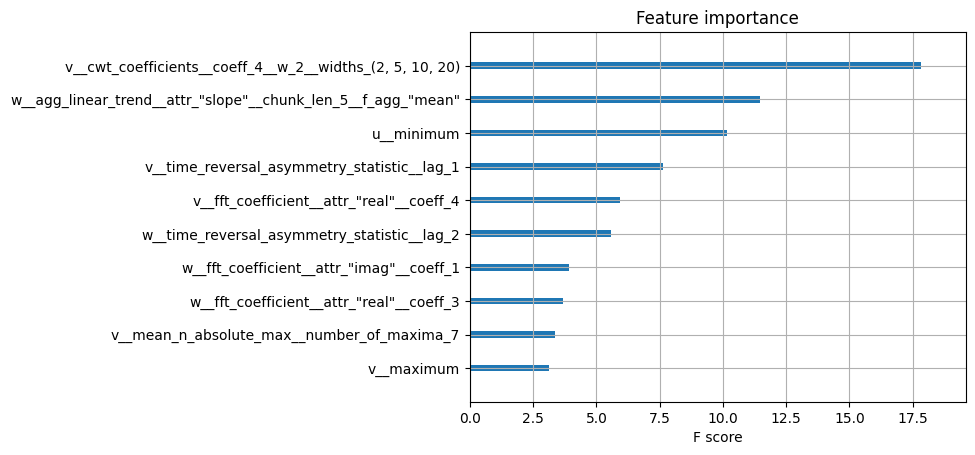

In [9]:
plot_importance(model_tsfresh, importance_type='gain', show_values=False, ylabel='', max_num_features=10)
plt.show()

# TSFuse

Step 1: Convert data to TSFuse format

In [10]:
X_train_tsfuse = dict()
X_test_tsfuse = dict()

for signal in ('u', 'v', 'w'):
    X_train_tsfuse[signal] = Collection(X_train[['id', 'time', signal]])
    X_test_tsfuse[signal] = Collection(X_test[['id', 'time', signal]])

In [11]:
X_train_tsfuse['u'].shape

(140, 8, 1)

In [12]:
X_test_tsfuse['u'].shape

(86, 8, 1)

Step 2: Construct computation graph

In [13]:
features_train_tsfuse, computation_graph = construct(X_train_tsfuse, y_train, max_depth=2, return_graph=True)
features_train_tsfuse.head()

,"C3(Difference(Input(u), Input(v), rel=False), axis=time, lag=1)","C3(Difference(Input(w), Input(v), rel=False), axis=time, lag=1)","C3(Input(u), axis=time, lag=1)","C3(Ratio(Input(v), Input(u)), axis=time, lag=1)","C3(Ratio(Input(w), Input(v)), axis=time, lag=1)","CID(Difference(Input(u), Input(v), rel=False), axis=time)","CID(Difference(Input(w), Input(v), rel=False), axis=time)","CID(Input(u), axis=time)","CID(Ratio(Input(v), Input(u)), axis=time)","CID(Ratio(Input(w), Input(v)), axis=time)",...,"Sum(Difference(Input(u), Input(v), rel=False), axis=time)","Sum(Difference(Input(w), Input(v), rel=False), axis=time)","Sum(Input(u), axis=time)","Sum(Ratio(Input(v), Input(u)), axis=time)","Sum(Ratio(Input(w), Input(v)), axis=time)","Variance(Difference(Input(u), Input(v), rel=False), axis=time)","Variance(Difference(Input(w), Input(v), rel=False), axis=time)","Variance(Input(u), axis=time)","Variance(Ratio(Input(v), Input(u)), axis=time)","Variance(Ratio(Input(w), Input(v)), axis=time)"
0,0.000661,0.003341,2088.237244,1.098956,1.146046,0.132701,0.081231,0.135704,0.020312,0.011652,...,1.329712,1.991821,54.002441,8.197200,8.288045,0.001159,0.000858,0.004811,0.000027,0.000018
1,0.000385,0.014459,2300.466800,1.070325,1.204135,0.188372,0.151066,0.185209,0.027423,0.021365,...,0.955811,2.602051,55.338013,8.139306,8.369216,0.004485,0.006623,0.011250,0.000097,0.000127
2,0.000046,0.024029,2483.956073,1.049329,1.239500,0.190991,0.230471,0.171367,0.030733,0.032936,...,0.656494,3.098633,56.521973,8.090202,8.434121,0.003155,0.003164,0.003809,0.000072,0.000067
3,0.000076,0.022523,2746.885062,1.042991,1.227900,0.132627,0.151300,0.184529,0.029010,0.021610,...,0.626953,3.141968,57.895630,8.066987,8.430738,0.002114,0.002454,0.009702,0.000089,0.000048
4,0.000047,0.036608,2953.877036,1.026976,1.257393,0.113319,0.107131,0.161422,0.026504,0.014914,...,0.591675,3.460938,58.885376,8.060755,8.466753,0.002190,0.000718,0.002405,0.000084,0.000014


In [14]:
computation_graph

Step 3: Compute features on the test data

In [15]:
features_test_tsfuse = computation_graph.transform(X_test_tsfuse)

/opt/miniconda3/envs/tsfresh_tsfuse_demo/lib/python3.12/site-packages/scipy/stats/_stats_py.py:10919: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/opt/miniconda3/envs/tsfresh_tsfuse_demo/lib/python3.12/site-packages/scipy/stats/_stats_py.py:10933: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/opt/miniconda3/envs/tsfresh_tsfuse_demo/lib/python3.12/site-packages/scipy/stats/_stats_py.py:10936: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/opt/miniconda3/envs/tsfresh_tsfuse_demo/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/tsfresh_tsfuse_demo/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Step 4: Post-processing

In [16]:
# Make sure that the columns are the same in the train and test set
features = features_train_tsfuse.columns.intersection(features_test_tsfuse.columns)
features_train_tsfuse = features_train_tsfuse[features]
features_test_tsfuse = features_test_tsfuse[features]

Train a model on the generated features

In [17]:
model_tsfuse = XGBClassifier()
model_tsfuse.fit(features_train_tsfuse, y_train)
print(f'Accuracy: {model_tsfuse.score(features_test_tsfuse, y_test):.3f}')

Accuracy: 0.860


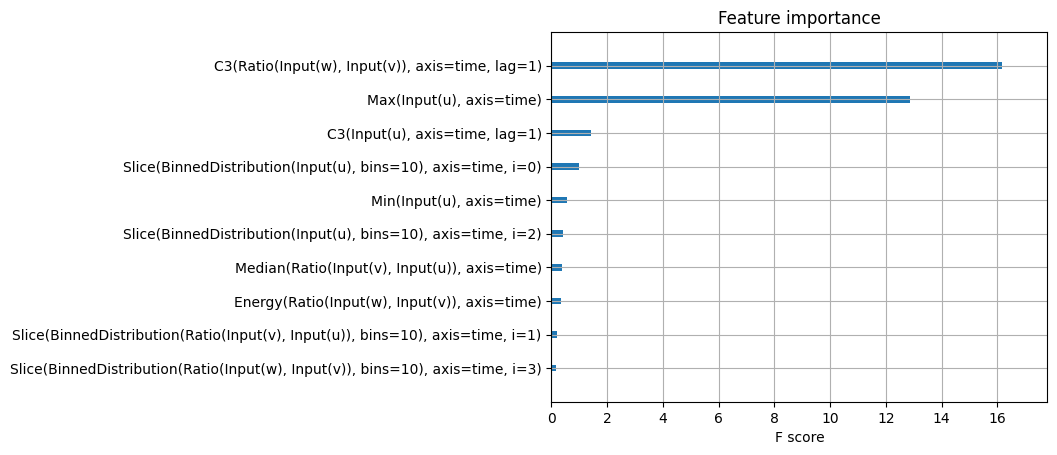

In [18]:
plot_importance(model_tsfuse, importance_type='gain', show_values=False, ylabel='', max_num_features=10)
plt.show()